In [1]:
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 39 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (11.7 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 155335 files and di

In [1]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

In [16]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import load_model
import glob
import seaborn as sns
from google.colab import drive
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
model_path = "/content/drive/MyDrive/model_sek/model_final"

In [4]:
from google.colab import drive


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
model_list = glob.glob(model_path+'/*')
model_list

['/content/drive/MyDrive/model_sek/model_final/model_VGG19_1_3sek.h5',
 '/content/drive/MyDrive/model_sek/model_final/VGG19_sek5_62-0.0012_BEST.hdf5',
 '/content/drive/MyDrive/model_sek/model_final/VGG19T_22-0.0370.hdf5',
 '/content/drive/MyDrive/model_sek/model_final/VGG19T_sek6_23-0.0274_BEST.hdf5',
 '/content/drive/MyDrive/model_sek/model_final/VGG19T_sek7_06-0.0002_BEST.hdf5',
 '/content/drive/MyDrive/model_sek/model_final/VGG19T_sek8_31-0.0240.hdf5']

In [7]:
pic_path = '/content/drive/MyDrive/안봐도보이조_project/final_test_img'

In [8]:
pic_path

'/content/drive/MyDrive/안봐도보이조_project/final_test_img'

In [9]:
glob.glob(pic_path+'/*')

['/content/drive/MyDrive/안봐도보이조_project/final_test_img/WIN_20220323_17_45_16_Pro.jpg',
 '/content/drive/MyDrive/안봐도보이조_project/final_test_img/WIN_20220323_17_45_27_Pro.jpg',
 '/content/drive/MyDrive/안봐도보이조_project/final_test_img/WIN_20220323_17_45_49_Pro.jpg',
 '/content/drive/MyDrive/안봐도보이조_project/final_test_img/WIN_20220323_17_45_53_Pro.jpg',
 '/content/drive/MyDrive/안봐도보이조_project/final_test_img/WIN_20220323_17_46_24_Pro.jpg',
 '/content/drive/MyDrive/안봐도보이조_project/final_test_img/WIN_20220323_17_46_39_Pro.jpg',
 '/content/drive/MyDrive/안봐도보이조_project/final_test_img/WIN_20220323_17_48_26_Pro.jpg',
 '/content/drive/MyDrive/안봐도보이조_project/final_test_img/WIN_20220323_17_48_32_Pro.jpg',
 '/content/drive/MyDrive/안봐도보이조_project/final_test_img/WIN_20220323_17_48_51_Pro.jpg',
 '/content/drive/MyDrive/안봐도보이조_project/final_test_img/WIN_20220323_17_48_55_Pro.jpg',
 '/content/drive/MyDrive/안봐도보이조_project/final_test_im

In [10]:
class_dict = {0:'갈아만든배', 1:'레쓰비', 2:'마운틴듀', 3:'밀키스', 4:'스프라이트', 5:'칠성사이다', 6:'코카콜라', 7:'트로피카나망고', 8:'펩시콜라', 9:'환타오렌지'}

In [ ]:
# import matplotlib.pyplot as plt 
# plt.rc('font', family='NanumGothic')

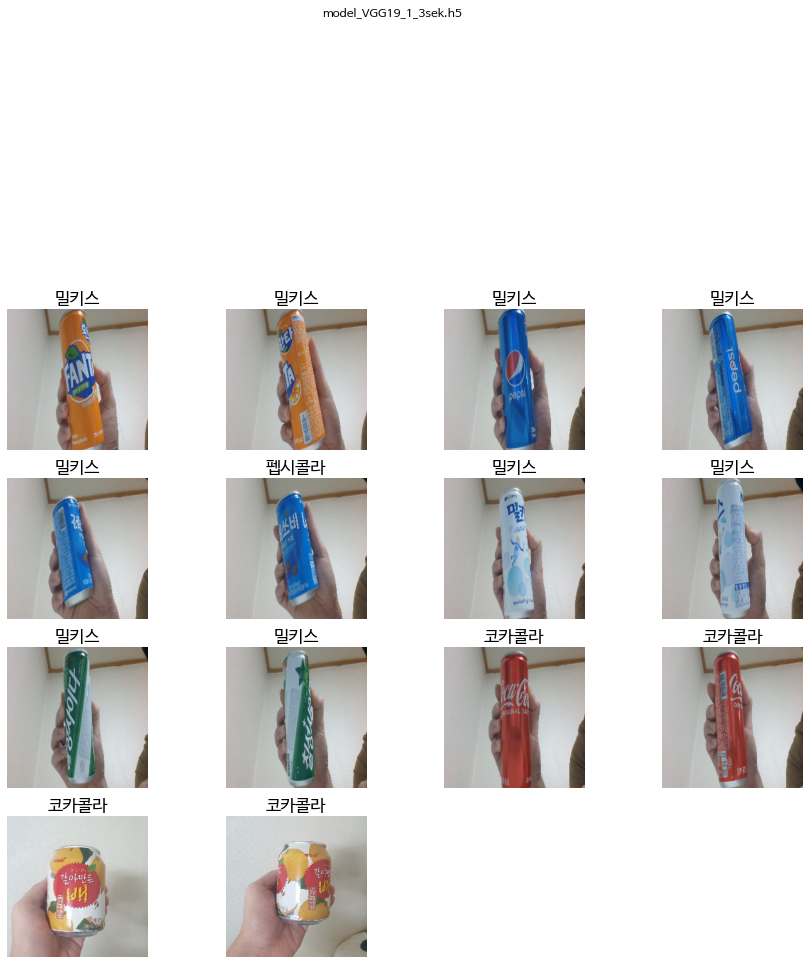

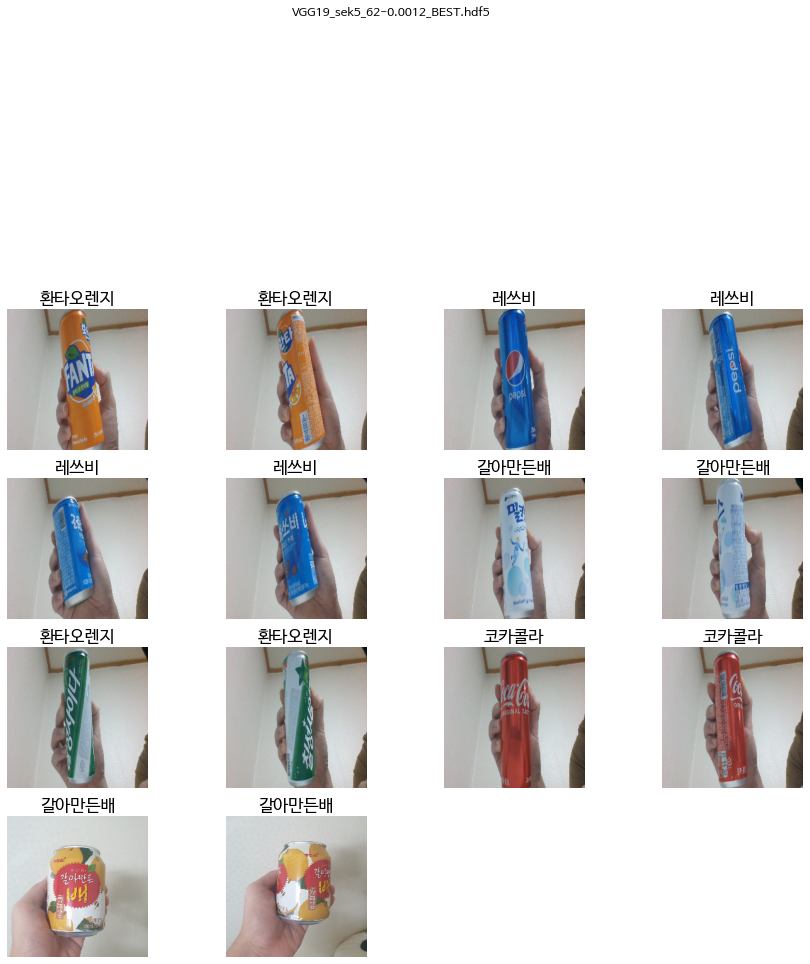

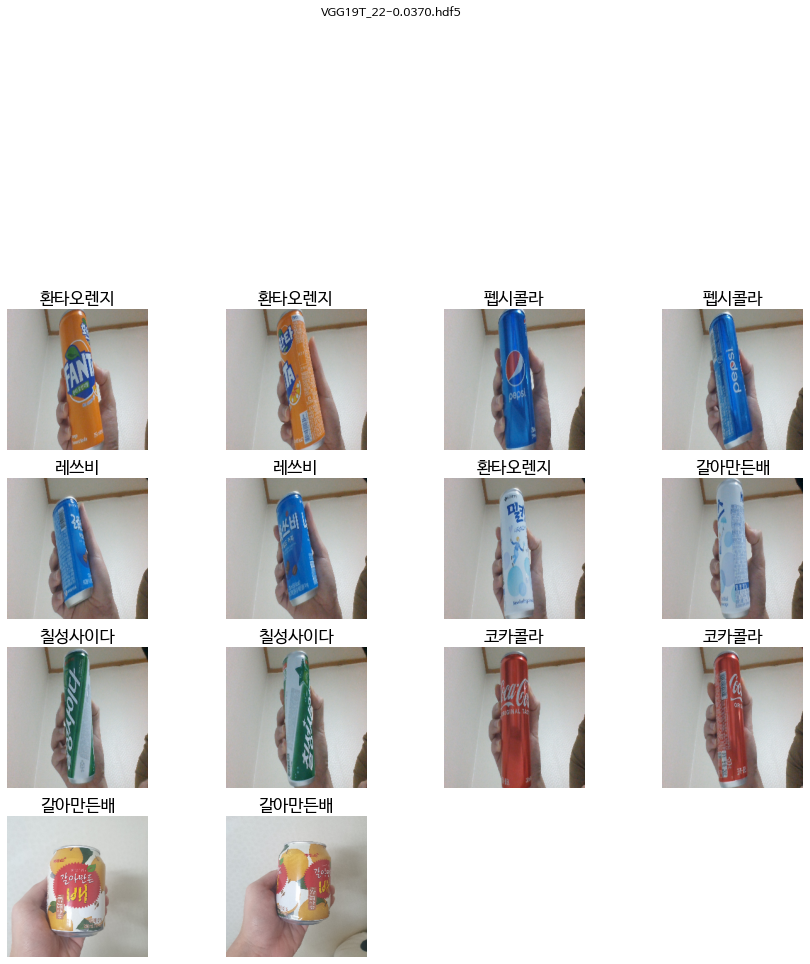

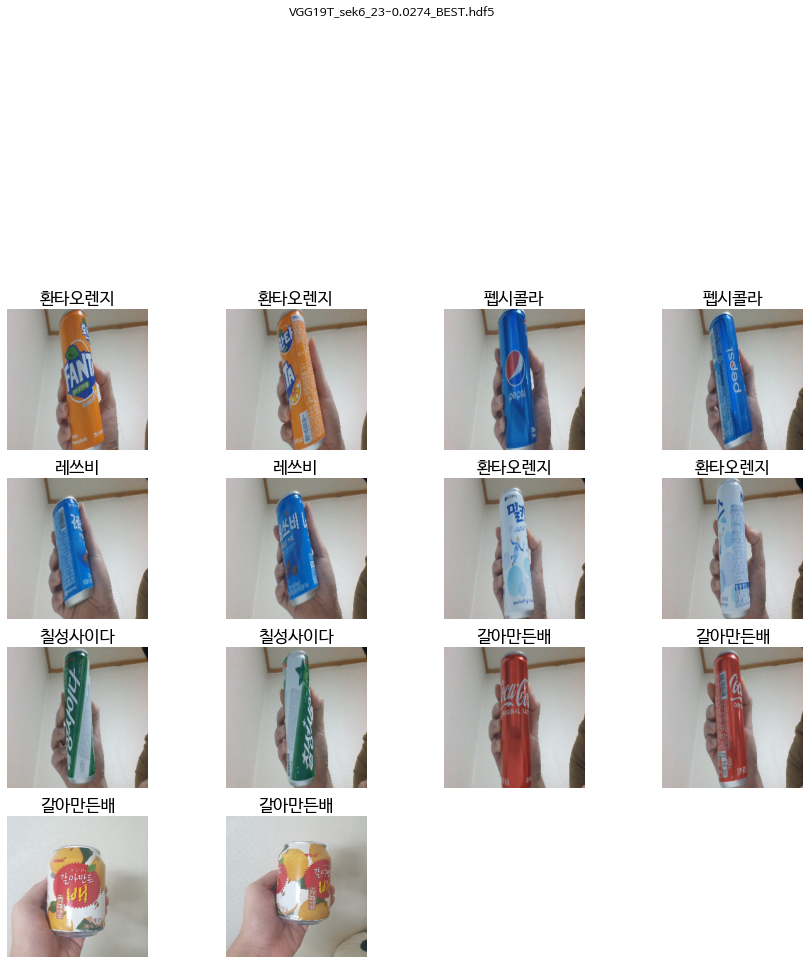

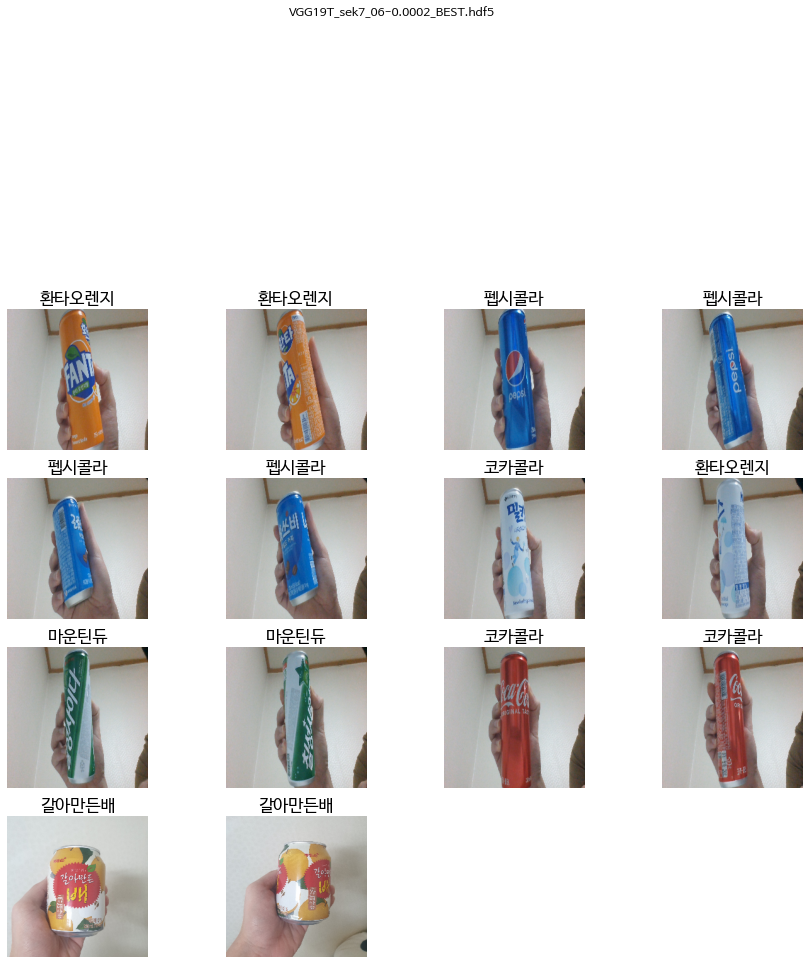

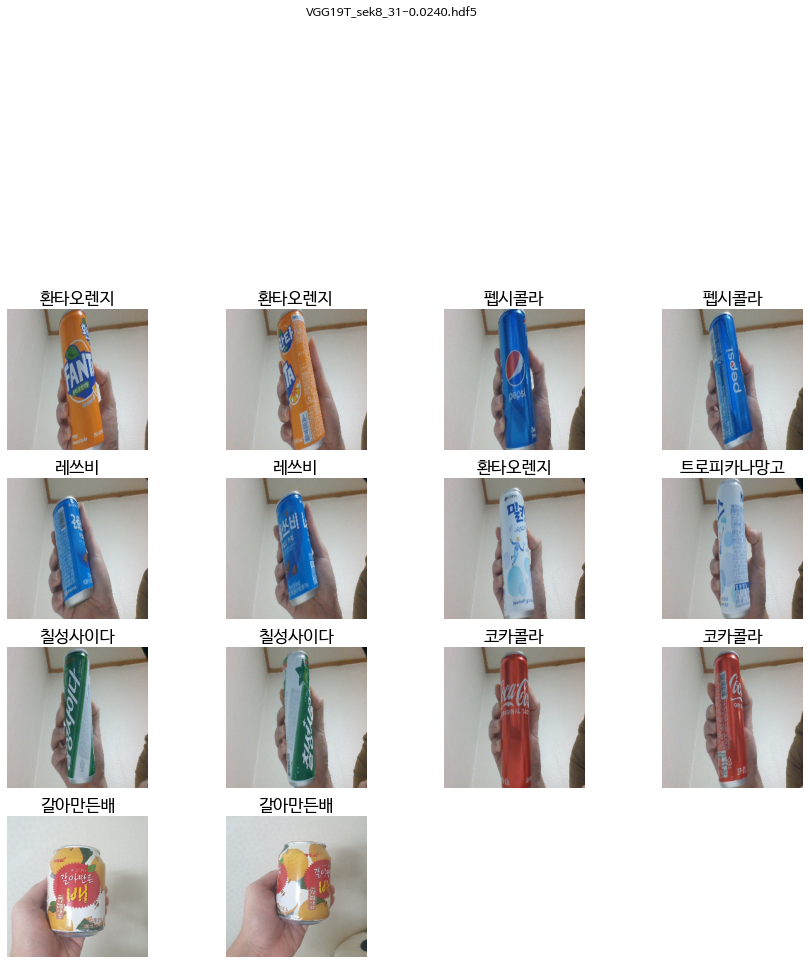

In [12]:
for path in model_list:
    model = load_model(path)
    name = path.split('/')[-1]
    fig = plt.figure(figsize=(15,15))
    i=0
    for img in glob.glob(pic_path + '/*'):
        ax = plt.subplot(4,4,i+1) 
        test_img = cv2.imread(img)
        test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)
        test_img = cv2.resize(test_img,(224,224))/255.0
        test_img_input = test_img.reshape((1,)+test_img.shape)
        pred = model.predict(test_img_input)
        pred_class = class_dict[np.argmax(pred, axis=1)[0]]
        ax.imshow(test_img)
        ax.axis('off')
        ax.set_title(f'{pred_class}',fontsize=17)
        i += 1
    plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.7, wspace=0.2, hspace=0.2)
    plt.suptitle(f'{name}')
    plt.show()
    

In [14]:
valid_path = '/content/drive/MyDrive/안봐도보이조_project/valid_10'
train_path = '/content/drive/MyDrive/안봐도보이조_project/train_10'
test_path = '/content/drive/MyDrive/안봐도보이조_project/test_10'

In [15]:
# 데이터셋 준비
train_datagen = ImageDataGenerator(rescale=1./255,         # 픽셀 값을 0~1 범위로 변환(scaling)
                                   rotation_range=40,      # 40도까지 회전
                                   width_shift_range=0.2,  # 20%까지 좌우 이동
                                   height_shift_range=0.2, # 20%까지 상하 이동
                                   shear_range=0.2,        # 20%까지 기울임
                                   zoom_range=0.2,         # 20%까지 확대/축소
                                   vertical_flip=True,
                                   horizontal_flip = True)   # 위아래 뒤집기
    
train_data = train_datagen.flow_from_directory(train_path, # 데이터가 존재하는 디렉토리
                                                    batch_size=100, # 배치사이즈(변경가능)
                                                    class_mode='categorical', # 다중 분류이므로 categorical
                                                    target_size=(224,224)) # 모델에 입력해줄 데이터 사이즈(변경가능)

valid_datagen = ImageDataGenerator(rescale=1./255) # 스케일링만 진행
valid_data = valid_datagen.flow_from_directory(valid_path,
                                              batch_size=20,      
                                              class_mode='categorical', 
                                              target_size=(224, 224))

test_datagen = ImageDataGenerator(rescale=1./255) # 스케일링만 진행
test_data = test_datagen.flow_from_directory(test_path,
                                                  batch_size=10,      
                                                  class_mode='categorical', 
                                                  target_size=(224, 224),shuffle=False) #test data 에선  shuffle false 로 해야

Found 10529 images belonging to 10 classes.
Found 1000 images belonging to 10 classes.
Found 500 images belonging to 10 classes.


In [17]:
Y_pred = model.predict(test_data)
classes = test_data.classes[test_data.index_array]
y_pred = np.argmax(Y_pred, axis=1) 

# class_names = ['갈아만든배', '레쓰비', '마운틴듀', '밀키스', '스프라이트', '칠성사이다', '코카콜라', '트로피카나망고', '펩시콜라', '환타오렌지'] 
result_dict = dict(map(reversed, test_data.class_indices.items()))
class_names = list(result_dict.values())

print('-- Confusion Matrix --')
print(confusion_matrix(classes, y_pred))

print('-- Classification Report --')
print(classification_report(classes, y_pred, target_names=class_names))

-- Confusion Matrix --
[[50  0  0  0  0  0  0  0  0  0]
 [ 0 49  0  0  0  0  0  0  1  0]
 [ 0  0 50  0  0  0  0  0  0  0]
 [ 0  0  0 50  0  0  0  0  0  0]
 [ 0  0  0  0 50  0  0  0  0  0]
 [ 0  0  0  0  0 50  0  0  0  0]
 [ 0  0  0  0  0  1 47  1  0  1]
 [ 0  0  0  0  0  0  0 50  0  0]
 [ 0  1  0  0  0  0  0  0 49  0]
 [ 0  0  0  0  0  0  0  0  0 50]]
-- Classification Report --
                 precision    recall  f1-score   support

  갈아만든배       1.00      1.00      1.00        50
         레쓰비       0.98      0.98      0.98        50
     마운틴듀       1.00      1.00      1.00        50
        밀키스       1.00      1.00      1.00        50
     스프라이트       1.00      1.00      1.00        50
   칠성사이다       0.98      1.00      0.99        50
      코카콜라       1.00      0.94      0.97        50
트로피카나망고       0.98      1.00      0.99        50
     펩시콜라       0.98      0.98      0.98        50
   환타오렌지       0.98      1.00      0.99 

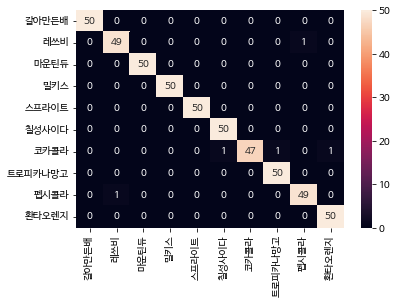

In [18]:
sns.heatmap(confusion_matrix(classes, y_pred), annot=True, fmt='d',
            xticklabels=['갈아만든배', '레쓰비', '마운틴듀', '밀키스', '스프라이트', '칠성사이다', '코카콜라', '트로피카나망고', '펩시콜라', '환타오렌지'] ,
            yticklabels=['갈아만든배', '레쓰비', '마운틴듀', '밀키스', '스프라이트', '칠성사이다', '코카콜라', '트로피카나망고', '펩시콜라', '환타오렌지'] )

-- model_VGG19_1_3sek.h5-Confusion Matrix --
[[ 0  0  0 35  0  0 15  0  0  0]
 [ 0  0  0 24  0  0  0  0 26  0]
 [ 0  0  0 47  0  0  3  0  0  0]
 [ 0  0  0 50  0  0  0  0  0  0]
 [ 0  0  1 30  5  1  0  0 13  0]
 [ 4  0  4 38  0  1  0  0  0  3]
 [ 0  0  0 46  0  0  4  0  0  0]
 [ 0  0  0 34  0  0 16  0  0  0]
 [ 0  0  0 27  0  0  0  0 23  0]
 [ 0  0  0 44  0  0  1  0  0  5]]
-- model_VGG19_1_3sek.h5-Classification Report --
                 precision    recall  f1-score   support

  갈아만든배       0.00      0.00      0.00        50
         레쓰비       0.00      0.00      0.00        50
     마운틴듀       0.00      0.00      0.00        50
        밀키스       0.13      1.00      0.24        50
     스프라이트       1.00      0.10      0.18        50
   칠성사이다       0.50      0.02      0.04        50
      코카콜라       0.10      0.08      0.09        50
트로피카나망고       0.00      0.00      0.00        50
     펩시콜라       0.37      0.46      0.41        50
   

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


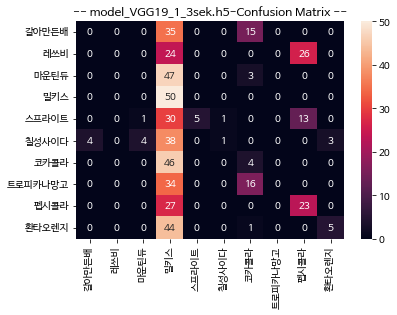

-- VGG19_sek5_62-0.0012_BEST.hdf5-Confusion Matrix --
[[50  0  0  0  0  0  0  0  0  0]
 [ 0 49  0  0  0  0  0  0  1  0]
 [ 0  0 50  0  0  0  0  0  0  0]
 [ 0  0  0 50  0  0  0  0  0  0]
 [ 0  0  0  0 50  0  0  0  0  0]
 [ 0  0  0  0  0 50  0  0  0  0]
 [ 0  0  0  0  0  0 50  0  0  0]
 [ 0  0  0  0  0  0  0 50  0  0]
 [ 0  0  0  0  0  0  0  0 50  0]
 [ 0  0  0  0  0  0  0  0  0 50]]
-- VGG19_sek5_62-0.0012_BEST.hdf5-Classification Report --
                 precision    recall  f1-score   support

  갈아만든배       1.00      1.00      1.00        50
         레쓰비       1.00      0.98      0.99        50
     마운틴듀       1.00      1.00      1.00        50
        밀키스       1.00      1.00      1.00        50
     스프라이트       1.00      1.00      1.00        50
   칠성사이다       1.00      1.00      1.00        50
      코카콜라       1.00      1.00      1.00        50
트로피카나망고       1.00      1.00      1.00        50
     펩시콜라       0.98      1.00      

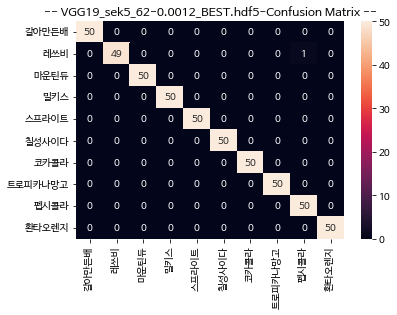

-- VGG19T_22-0.0370.hdf5-Confusion Matrix --
[[49  0  1  0  0  0  0  0  0  0]
 [ 0 50  0  0  0  0  0  0  0  0]
 [ 0  0 50  0  0  0  0  0  0  0]
 [ 0  0  0 50  0  0  0  0  0  0]
 [ 0  0  0  0 50  0  0  0  0  0]
 [ 0  0  0  0  0 50  0  0  0  0]
 [ 0  0  0  0  0  0 49  1  0  0]
 [ 0  0  0  0  0  0  0 50  0  0]
 [ 0  1  0  0  0  0  0  0 49  0]
 [ 0  0  0  0  0  0  1  0  0 49]]
-- VGG19T_22-0.0370.hdf5-Classification Report --
                 precision    recall  f1-score   support

  갈아만든배       1.00      0.98      0.99        50
         레쓰비       0.98      1.00      0.99        50
     마운틴듀       0.98      1.00      0.99        50
        밀키스       1.00      1.00      1.00        50
     스프라이트       1.00      1.00      1.00        50
   칠성사이다       1.00      1.00      1.00        50
      코카콜라       0.98      0.98      0.98        50
트로피카나망고       0.98      1.00      0.99        50
     펩시콜라       1.00      0.98      0.99        50
   

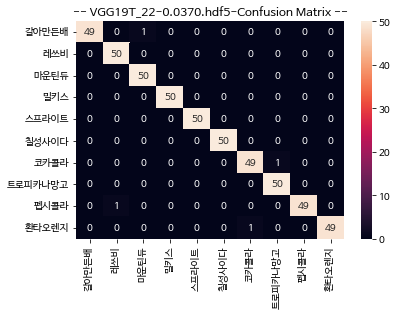

-- VGG19T_sek6_23-0.0274_BEST.hdf5-Confusion Matrix --
[[49  0  1  0  0  0  0  0  0  0]
 [ 0 50  0  0  0  0  0  0  0  0]
 [ 0  0 50  0  0  0  0  0  0  0]
 [ 0  0  0 50  0  0  0  0  0  0]
 [ 0  0  0  0 50  0  0  0  0  0]
 [ 0  0  0  0  0 50  0  0  0  0]
 [ 0  0  0  0  0  0 50  0  0  0]
 [ 0  0  0  0  0  0  0 50  0  0]
 [ 0  2  0  0  0  0  0  0 48  0]
 [ 0  0  0  0  0  0  0  0  0 50]]
-- VGG19T_sek6_23-0.0274_BEST.hdf5-Classification Report --
                 precision    recall  f1-score   support

  갈아만든배       1.00      0.98      0.99        50
         레쓰비       0.96      1.00      0.98        50
     마운틴듀       0.98      1.00      0.99        50
        밀키스       1.00      1.00      1.00        50
     스프라이트       1.00      1.00      1.00        50
   칠성사이다       1.00      1.00      1.00        50
      코카콜라       1.00      1.00      1.00        50
트로피카나망고       1.00      1.00      1.00        50
     펩시콜라       1.00      0.96    

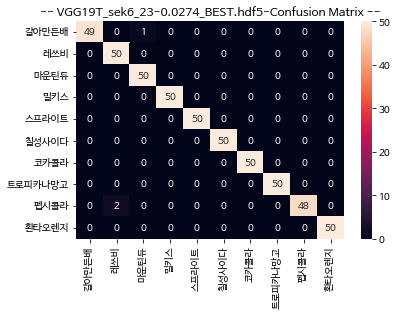

-- VGG19T_sek7_06-0.0002_BEST.hdf5-Confusion Matrix --
[[50  0  0  0  0  0  0  0  0  0]
 [ 0 50  0  0  0  0  0  0  0  0]
 [ 0  0 50  0  0  0  0  0  0  0]
 [ 0  0  0 50  0  0  0  0  0  0]
 [ 0  0  0  0 50  0  0  0  0  0]
 [ 0  0  0  0  0 50  0  0  0  0]
 [ 0  0  0  0  0  0 50  0  0  0]
 [ 0  0  0  0  0  0  0 50  0  0]
 [ 0  0  0  0  0  0  0  0 50  0]
 [ 0  0  0  0  0  0  0  0  0 50]]
-- VGG19T_sek7_06-0.0002_BEST.hdf5-Classification Report --
                 precision    recall  f1-score   support

  갈아만든배       1.00      1.00      1.00        50
         레쓰비       1.00      1.00      1.00        50
     마운틴듀       1.00      1.00      1.00        50
        밀키스       1.00      1.00      1.00        50
     스프라이트       1.00      1.00      1.00        50
   칠성사이다       1.00      1.00      1.00        50
      코카콜라       1.00      1.00      1.00        50
트로피카나망고       1.00      1.00      1.00        50
     펩시콜라       1.00      1.00    

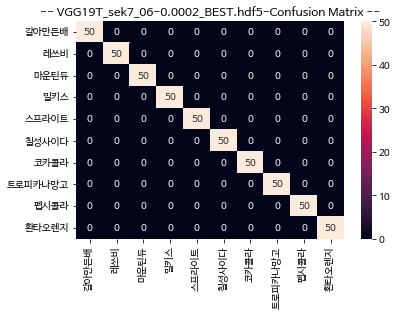

-- VGG19T_sek8_31-0.0240.hdf5-Confusion Matrix --
[[50  0  0  0  0  0  0  0  0  0]
 [ 0 49  0  0  0  0  0  0  1  0]
 [ 0  0 50  0  0  0  0  0  0  0]
 [ 0  0  0 50  0  0  0  0  0  0]
 [ 0  0  0  0 50  0  0  0  0  0]
 [ 0  0  0  0  0 50  0  0  0  0]
 [ 0  0  0  0  0  1 47  1  0  1]
 [ 0  0  0  0  0  0  0 50  0  0]
 [ 0  1  0  0  0  0  0  0 49  0]
 [ 0  0  0  0  0  0  0  0  0 50]]
-- VGG19T_sek8_31-0.0240.hdf5-Classification Report --
                 precision    recall  f1-score   support

  갈아만든배       1.00      1.00      1.00        50
         레쓰비       0.98      0.98      0.98        50
     마운틴듀       1.00      1.00      1.00        50
        밀키스       1.00      1.00      1.00        50
     스프라이트       1.00      1.00      1.00        50
   칠성사이다       0.98      1.00      0.99        50
      코카콜라       1.00      0.94      0.97        50
트로피카나망고       0.98      1.00      0.99        50
     펩시콜라       0.98      0.98      0.98    

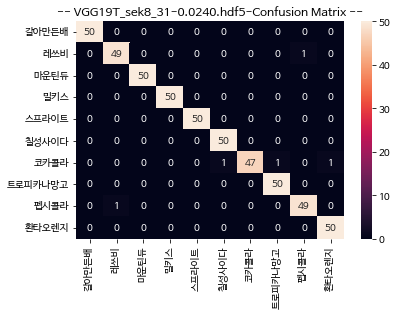

In [19]:
for path in model_list:
    model = load_model(path)
    name = path.split('/')[-1]
    Y_pred = model.predict(test_data)
    classes = test_data.classes[test_data.index_array]
    y_pred = np.argmax(Y_pred, axis=1) 

    # class_names = ['갈아만든배', '레쓰비', '마운틴듀', '밀키스', '스프라이트', '칠성사이다', '코카콜라', '트로피카나망고', '펩시콜라', '환타오렌지'] 
    result_dict = dict(map(reversed, test_data.class_indices.items()))
    class_names = list(result_dict.values())

    print(f'-- {name}-Confusion Matrix --')
    print(confusion_matrix(classes, y_pred))

    print(f'-- {name}-Classification Report --')
    print(classification_report(classes, y_pred, target_names=class_names))
    

    ax= sns.heatmap(confusion_matrix(classes, y_pred), annot=True, fmt='d',
            xticklabels=['갈아만든배', '레쓰비', '마운틴듀', '밀키스', '스프라이트', '칠성사이다', '코카콜라', '트로피카나망고', '펩시콜라', '환타오렌지'] ,
            yticklabels=['갈아만든배', '레쓰비', '마운틴듀', '밀키스', '스프라이트', '칠성사이다', '코카콜라', '트로피카나망고', '펩시콜라', '환타오렌지'] )
    plt.title(f'-- {name}-Confusion Matrix --')
    plt.show() 
